# Exploratory Data Analysis - Analysis

### EDA Scenario:
    
Boss needs a report on the Colorado Spills data over the last few years and wants you to find the answers to the following questions:
- How many reporting violations happened in the dataset?
- What operator had the most spills?
- Compared to 2019, for 2020 has the amount of oil spilled increased or decreased and by how much?
- Anything else noteworthy in the dataset?

Other constraints from your initial meeting with your boss:
- Data starts in 2014 with digital reporting (anything before 2014 was manually entered after the fact and might not be as accurate - please don't use data prior to 2014 for this analysis)
- A reporting violation happens when the company does not report a spill within the 10 day window of finding it
- The mobile app went into 'production' on Mar 15th, 2019. 

### Data

This spill data was taken from the Colorado Oil and Gas Commission downloads here:
https://cogcc.state.co.us/data2.html#/downloads

The dataset also comes with a data dictionary which is included in this lesson.
The data was modified from its original form to showcase some examples for this lesson. 

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
# Loading the data

spills_df = pd.read_csv('CO_Spills_cleaned.csv', parse_dates=['Initial_report_date', 'Date_of_discovery'])
print(len(spills_df))
spills_df.head()

10793


,Document_num,Operator,Operator_num,Initial_report_date,Date_of_discovery,County,Facility_type,Spilled_outside_of_berms,More_than_five_barrels_spilled,Current_land_use,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed,OSV_0,OSV_gt_0_lt_1,OSV_gte_1_lt_5,OSV_gte_100,OSV_gte_5_lt_100,OSV_Unknown
0,400579956,ENCANA OIL & GAS (USA) INC,100185,2014-03-27,2014-03-26,BROOMFIELD,TANK BATTERY,0,0,CROP LAND,1,0,0,0,1,NaN,NaN,NaN,0,1,0,0,0,0,0
1,400596170,ENCANA OIL & GAS (USA) INC,100185,2014-03-27,2014-03-26,BROOMFIELD,TANK BATTERY,0,0,CROP LAND,1,0,0,0,1,0.0,0.0,0.0,0,1,0,0,0,0,0
2,400596597,XTO ENERGY INC,100264,2014-04-25,2014-04-24,LAS ANIMAS,WELL,1,1,NON-CROP LAND,0,0,0,0,0,NaN,NaN,NaN,0,1,0,0,0,0,0
3,400597054,K P KAUFFMAN COMPANY INC,46290,2014-04-28,2014-04-21,WELD,PIT,1,0,NON-CROP LAND,0,0,0,0,0,NaN,NaN,NaN,0,1,0,0,0,0,0
4,400597258,OXY USA WTP LP,66571,2014-04-28,2014-04-26,GARFIELD,WELL PAD,1,0,OTHER,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0


#### Assumptions:

- Duplicate rows with the same `Document_num` can be removed
- Date_of_Discovery	is the best to use for filter out records from 2014 onwards.
- Spilled_outside_of_berms / More_than_five_barrels_spilled - Y/y & N/n values are the same
- "" in Oil_BBLs_Spilled means Unknown and I replace with NaN
- Y/N 1/0 T/F values can be treated the same in these columns: 
  - Spilled_outside_of_berms, More_than_five_barrels_spilled, Waters_of_the_State, Residence_Occupied_Structure, Livestock	Public_Byway, Surface_Water_Supply_Area, Corrective_Actions_Completed 
- NaNs in the same columns can be made 0s
- Ok to drop these columns:
  - Report, Tracking_Num, Latitude, Longitude, Municipality, Facility_ID, Weather_Conditions, Spill_Description, Oil_Spill_Volume

#### Q1: How many reporting violations happened in the dataset?

A reporting violation happens when the company does not report a spill within the 10 day window.

To get the 10 day window lets make a new column with the difference between the 'Initial_Report_Date' and the 'Date_of_Discovery' columns.

In [3]:
spills_df['Report_timeframe'] = spills_df['Initial_report_date'] - spills_df['Date_of_discovery']

In [4]:
spills_df[['Initial_report_date', 'Date_of_discovery', 'Report_timeframe']]

,Initial_report_date,Date_of_discovery,Report_timeframe
0,2014-03-27,2014-03-26,1 days
1,2014-03-27,2014-03-26,1 days
2,2014-04-25,2014-04-24,1 days
3,2014-04-28,2014-04-21,7 days
4,2014-04-28,2014-04-26,2 days
...,...,...,...
10788,2021-06-23,2021-06-17,6 days
10789,2021-06-25,2021-06-25,0 days
10790,2021-07-07,2021-07-05,2 days
10791,2021-07-07,2021-07-07,0 days


In [5]:
spills_df[spills_df['Report_timeframe'] > np.timedelta64(10, 'D')].head(5)

,Document_num,Operator,Operator_num,Initial_report_date,Date_of_discovery,County,Facility_type,Spilled_outside_of_berms,More_than_five_barrels_spilled,Current_land_use,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed,OSV_0,OSV_gt_0_lt_1,OSV_gte_1_lt_5,OSV_gte_100,OSV_gte_5_lt_100,OSV_Unknown,Report_timeframe
10,400600845,PDC ENERGY INC,69175,2014-05-02,2014-01-22,WELD,TANK BATTERY,0,0,CROP LAND,0,0,0,0,0,0.0,0.0,0.0,1,1,0,0,0,0,0,100 days
11,400601729,NOBLE ENERGY INC,100322,2014-05-05,2014-04-21,WELD,TANK BATTERY,0,1,OTHER,0,0,0,0,0,NaN,NaN,NaN,0,0,0,1,0,0,0,14 days
12,400601998,ENCANA OIL & GAS (USA) INC,100185,2014-05-05,2014-02-22,WELD,TANK BATTERY,0,0,CROP LAND,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,1,72 days
19,400603164,PDC ENERGY INC,69175,2014-05-06,2014-02-20,WELD,TANK BATTERY,0,0,CROP LAND,0,0,0,0,0,0.0,0.0,0.0,1,1,0,0,0,0,0,75 days
21,400603415,NOBLE ENERGY INC,100322,2014-05-06,2014-04-22,WELD,TANK BATTERY,1,0,CROP LAND,0,0,0,0,0,NaN,NaN,NaN,0,1,0,0,0,0,0,14 days


In [6]:
viol_len = len(spills_df[spills_df['Report_timeframe'] > np.timedelta64(10, 'D')])
print('# of violations over 10 days:', viol_len)
print('Total Reports:', len(spills_df))
print('Percent of violations over 10 days:', viol_len / len(spills_df))

# of violations over 10 days: 431
Total Reports: 10793
Percent of violations over 10 days: 0.03993329009543223


##### Q2: What operator had the most spills?

For this, the simple answer is to check the value_counts.

In [7]:
spills_df['Operator'].value_counts(dropna=False).head(30)

NOBLE ENERGY INC                              1548
KERR MCGEE OIL & GAS ONSHORE LP               1256
PDC ENERGY INC                                 663
BONANZA CREEK ENERGY OPERATING COMPANY LLC     484
CAERUS PICEANCE LLC                            429
PIONEER NATURAL RESOURCES USA INC              344
CHEVRON USA INC                                323
LARAMIE ENERGY LLC                             267
WHITING OIL & GAS CORPORATION                  234
TEP ROCKY MOUNTAIN LLC                         232
WPX ENERGY ROCKY MOUNTAIN LLC                  219
BP AMERICA PRODUCTION COMPANY                  211
FOUNDATION ENERGY MANAGEMENT LLC               204
HIGHPOINT OPERATING CORPORATION                203
GREAT WESTERN OPERATING COMPANY LLC            172
KERR MCGEE GATHERING LLC                       165
KP KAUFFMAN COMPANY INC                        164
ENCANA OIL & GAS (USA) INC                     158
EXTRACTION OIL & GAS INC                       154
DCP MIDSTREAM LP               

Checking that I see that sometimes companies are named similar things and might be subsidaries. Scanning the Top 10, none of the Names are repeated but there is another KERR MCGEE in to the top 20. 

The difference between #1 and #5 seem far enough away from the others that I want to search those five to see if other names are similar 

(after #5 there would need to be at least 15 companies of at least a 75 count to overtake #1 which could happen but seems unlikely.)

In [8]:
operator_vc = spills_df['Operator'].value_counts(dropna=False).reset_index()
operator_vc.columns = ['Operator', 'Count']
operator_vc['Operator'] = operator_vc['Operator'].str.upper()
operator_vc.head(15)

,Operator,Count
0,NOBLE ENERGY INC,1548
1,KERR MCGEE OIL & GAS ONSHORE LP,1256
2,PDC ENERGY INC,663
3,BONANZA CREEK ENERGY OPERATING COMPANY LLC,484
4,CAERUS PICEANCE LLC,429
5,PIONEER NATURAL RESOURCES USA INC,344
6,CHEVRON USA INC,323
7,LARAMIE ENERGY LLC,267
8,WHITING OIL & GAS CORPORATION,234
9,TEP ROCKY MOUNTAIN LLC,232


In [9]:
operator_vc[operator_vc['Operator'].str.contains('NOBLE')]

,Operator,Count
0,NOBLE ENERGY INC,1548
48,NOBLE MIDSTREAM SERVICES LLC,29


In [10]:
operator_vc[operator_vc['Operator'].str.contains('NOBLE')]['Count'].sum()

1577

In [11]:
operator_vc[operator_vc['Operator'].str.contains('KERR')]

,Operator,Count
1,KERR MCGEE OIL & GAS ONSHORE LP,1256
15,KERR MCGEE GATHERING LLC,165


In [12]:
operator_vc[operator_vc['Operator'].str.contains('KERR')]['Count'].sum()

1421

In [13]:
operator_vc[operator_vc['Operator'].str.contains('PDC')]

,Operator,Count
2,PDC ENERGY INC,663


In [14]:
operator_vc[operator_vc['Operator'].str.contains('BONANZA')]

,Operator,Count
3,BONANZA CREEK ENERGY OPERATING COMPANY LLC,484


In [15]:
operator_vc[operator_vc['Operator'].str.contains('CAERUS')]

,Operator,Count
4,CAERUS PICEANCE LLC,429
76,CAERUS WASHCO LLC,15


Even with the other company names Noble Energy still has the most spills over the time period.

##### Q3: Compared to 2019, for 2020 has the amount of oil spilled increased or decreased and by how much?

In [16]:
spills_2019 = spills_df[(spills_df['Date_of_discovery'] >= '2019-01-01') & 
                        (spills_df['Date_of_discovery'] < '2020-01-01')]

spills_2019['Date_of_discovery'].value_counts(dropna=False)

2019-03-06    18
2019-01-17    16
2019-09-24    15
2019-01-07    15
2019-12-11    15
              ..
2019-12-20     1
2019-07-11     1
2019-04-23     1
2019-09-06     1
2019-06-07     1
Name: Date_of_discovery, Length: 284, dtype: int64

In [17]:
spills_2020 = spills_df[(spills_df['Date_of_discovery'] >= '2020-01-01') & 
                        (spills_df['Date_of_discovery'] < '2021-01-01')]

spills_2020['Date_of_discovery'].value_counts(dropna=False)

2020-06-26    16
2020-02-18    15
2020-12-07    15
2020-01-14    14
2020-11-10    13
              ..
2020-04-09     1
2020-04-15     1
2020-07-29     1
2020-11-30     1
2020-12-24     1
Name: Date_of_discovery, Length: 252, dtype: int64

In [18]:
spills_2019['Oil_bbls_spilled'].sum()

2499.0

In [19]:
spills_2020['Oil_bbls_spilled'].sum()

7080.0

As a preview to future lessons, an advanced way is to use groupby and then plotting it on a line chart. First I'll make a column of the year and then  group by that column summing up the spill volume.

In [20]:
spills_df['Year'] = pd.DatetimeIndex(spills_df['Date_of_discovery']).year

In [21]:
spills_df['Year'].value_counts(dropna=False)

2017    1571
2015    1568
2018    1548
2019    1530
2014    1363
2016    1354
2020    1132
2021     727
Name: Year, dtype: int64

In [22]:
oil_spilled = spills_df[['Oil_bbls_spilled', 'Year']].groupby('Year').agg(sum)
oil_spilled

,Oil_bbls_spilled
Year,
2014,2157.0
2015,1617.0
2016,3180.0
2017,3166.0
2018,1045.0
2019,2499.0
2020,7080.0
2021,2019.0


<AxesSubplot:xlabel='Year'>

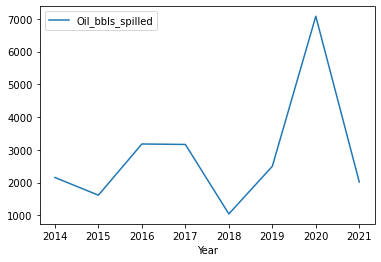

In [23]:
oil_spilled.plot()

This seems like an easy answer but I want to check the 'Oil_BBLs_Spilled' is accurate. First I'll check the outliers. 

In [27]:
spills_df[['Year', 'Oil_bbls_spilled']].sort_values('Oil_bbls_spilled', ascending=False).head(10)

,Year,Oil_bbls_spilled
9695,2020,1200.0
9662,2020,1120.0
9615,2020,1120.0
3124,2016,950.0
1075,2014,600.0
10416,2021,460.0
10318,2021,460.0
9380,2020,350.0
10246,2020,350.0
9904,2020,350.0


The top 3 are in 2020 (and 5 of the top 10) with the first spot being almost being 4 times the 10th.

A note on outliers: If an outlier is 10x-100x the next entry something might be amiss. Some sort of data entry error could have occured or some other problem. I would check that entry - talk to the data owner or SME and find out whats going on. Usually the outlier has a story to tell and might be something that shows a very good or bad application of the whole process.

If the outlier is going to skew the analysis badly one way or another, consideration might be to drop that entry. (and I would check the analysis both with the outlier and without it to check). Generally, I'm hesitant to drop the outlier rows unless I get confirmation that the entry is in error.

In [29]:
spills_df[['Year', 'Oil_bbls_spilled']].sort_values('Oil_bbls_spilled').head(5)

,Year,Oil_bbls_spilled
5046,2017,-5.0
486,2014,-2.0
1,2014,0.0
6609,2018,0.0
6610,2018,0.0


I'm not sure what negative numbers mean here? Might be a question to ask the data owner/expert!

In [21]:
spills_2019[['Oil_bbls_spilled','OSV_0', 'OSV_gt_0_lt_1', 'OSV_gte_1_lt_5', 
             'OSV_gte_100', 'OSV_gte_5_lt_100', 'OSV_Unknown']].sort_values('OSV_0').head(10)

,Oil_bbls_spilled,OSV_0,OSV_gt_0_lt_1,OSV_gte_1_lt_5,OSV_gte_100,OSV_gte_5_lt_100,OSV_Unknown
7027,NaN,0,0,0,1,0,0
8514,NaN,0,0,0,0,0,1
7735,NaN,0,0,0,0,0,1
7737,NaN,0,0,0,0,0,1
7739,5.0,0,0,1,0,0,0
7741,NaN,0,1,0,0,0,0
7742,NaN,0,0,1,0,0,0
7743,NaN,0,0,1,0,0,0
7744,NaN,0,0,1,0,0,0
7731,NaN,0,0,0,0,0,1


No, it doesn't look very accurate. The NaN values in this column do not check with the OSV columns. I could throw an estimate out for each of the OSV columns but this seems like its making too many assumptions (where to set the value?). 

Sometimes, the data quality is too poor to answer a question. In this case I would go back to my boss and tell him my concerns. If my boss absolutely needed an answer I could give the basic analysis but caveat that with my data quality concerns with examples.

##### Q4: Anything else noteworthy in the dataset?

This is an area where I as the analyst have some leeway to bring up concerns/issues/other items I want to check into. I would talk about any data quality issues that I have found as well as interesting outliers.

In [22]:
spills_df.describe()

,Document_num,Operator_num,Spilled_outside_of_berms,More_than_five_barrels_spilled,Waters_of_the_state,Residence_occupied_structure,Livestock,Public_byway,Surface_water_supply_area,Oil_bbls_spilled,Oil_bbls_recovered,Oil_unknown,Corrective_actions_completed,OSV_0,OSV_gt_0_lt_1,OSV_gte_1_lt_5,OSV_gte_100,OSV_gte_5_lt_100,OSV_Unknown,Report_timeframe
count,1.079300e+04,10793.000000,10793.000000,10793.00000,10793.000000,10793.000000,10793.000000,10793.000000,10793.000000,3684.000000,3704.000000,5013.000000,10793.000000,10793.000000,10793.000000,10793.000000,10793.000000,10793.000000,10793.000000,10780
mean,4.015716e+08,43858.529973,0.737793,0.45094,0.145187,0.006022,0.013064,0.020013,0.012415,6.178882,3.097732,0.261919,0.228018,0.597980,0.048643,0.129436,0.007783,0.071435,0.144723,5 days 04:30:38.070500927
std,6.413119e+05,36969.735376,0.439855,0.49761,0.352305,0.077374,0.113554,0.140051,0.110736,45.182543,18.581499,0.439723,0.419574,0.490329,0.215130,0.335697,0.087880,0.257562,0.351838,45 days 11:40:12.146978674
min,4.005800e+08,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,4.009800e+08,10433.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,4.014959e+08,36200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1 days 00:00:00
75%,4.021471e+08,78110.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2 days 00:00:00
max,4.027409e+08,200502.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1200.000000,344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1900 days 00:00:00


Here is a list of items that I found interesting and might want to research more or bring up to the boss:
    
- Would be good to have a 'Source' column to say where the report originated (manual entry, mobile app, web app)
- Y/N vs y/n - data entry error; are these entries from the mobile app?
- 74% of spills occur outside of berms. Are berms adequate for containment?
- Oil_BBLs_Spilled column has multiple NaNs and data quality issues; can this column be a mandatory entry?
- Biggest entered spill is 1200 BBLs - what happened there?
- Negative numbers in oil spilled - what do those mean?
- Biggest time between discovery and filing is 1900 days - data quality issue or something else?